In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def triangular_wave(x):
    """This function is used to define the trinagular wave in a given range"""
    return x + 2 if -2 <= x < 0 else 2 - x


def fourier_coeffs(n, L=2):
    """This function computes the fourier coefficients"""
    # Coefficients for cosine terms
    a_n = (1 / L) * np.sum([triangular_wave(x) * np.cos((n * np.pi * x) / L) for x in np.linspace(-L, L, 1000)])
    # Coefficients for sine terms
    b_n = (1 / L) * np.sum([triangular_wave(x) * np.sin((n * np.pi * x) / L) for x in np.linspace(-L, L, 1000)])
    return a_n, b_n

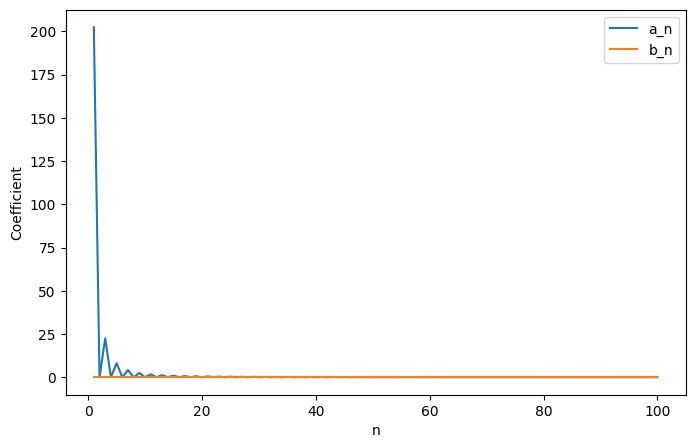

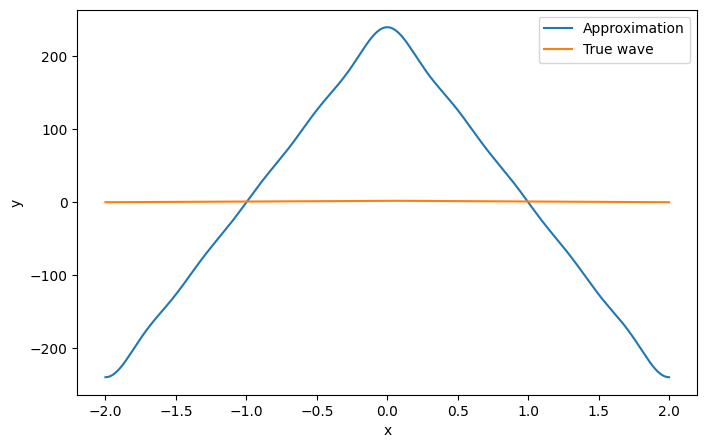

In [5]:
coeffs = [fourier_coeffs(n) for n in range(1, 101)]

# Plotting first 100 sine and cosine waves
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), [coeff[0] for coeff in coeffs], label='a_n')
plt.plot(range(1, 101), [coeff[1] for coeff in coeffs], label='b_n')
plt.xlabel('n')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

# Fourier series approximation using 10 modes
x_values = np.linspace(-2, 2, 1000)
y_values = [sum([coeffs[n-1][0]*np.cos((n*np.pi*x)/2) + coeffs[n-1][1]*np.sin((n*np.pi*x)/2) for n in range(1, 11)]) for x in x_values]

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Approximation')
plt.plot(x_values, [triangular_wave(x) for x in x_values], label='True wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
